In [160]:
!pip install openpyxl
!pip install seaborn

In [161]:
# libraries to assist with data manipulation, analysis, and visualization:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

---
---
### Notebook Outline
1. Reading in Data from Excel Files (Return data, risk free rate, excess returns calculated on excel)
2. Statistical Summary of Data
2. Task 0: Tangency Portfolio
3. Task 1: Markowitz Mean–Variance Portfolio Construction and Out-of-Sample Evaluation
4. Task 2: Naïve Portfolio Construction and Out-of-Sample Evaluation 
5. Task 3: Ledoit–Wolf Shrinkage-Based Portfolio Construction and Out-of-Sample Evaluation
6. Task 4: Constraint Portfolio Construction and Out-of-Sample Evaluation
7. Portfolio Return Visualizations and Comparative Plots 
8. Interpretation of Results and Economic Insights

---
---

### Reading in the Return Data from Excel


In [ ]:
# Importing the excess returns data from the Excel file, which is necessary for further analysis.
returns_df = pd.read_excel(r"", sheet_name = 'Returns Data', engine = 'openpyxl')
# rename the first column to 'Date', convert it to datetime format.
# Set the first column as the index, and sort the DataFrame by date. 
# Convert all excess return columns to numeric.
returns_df.rename(columns = {returns_df.columns[0]: 'Date'}, inplace = True)
returns_df['Date'] = pd.to_datetime(returns_df['Date'].astype(str), format = '%Y%m')
returns_df = returns_df.set_index('Date').sort_index()
returns_df = returns_df.apply(pd.to_numeric, errors = 'coerce')

display(returns_df.head())

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2001-08-01,-0.0567,-0.0410,-0.0206,-0.0044,0.0072,-0.0370,-0.0519,-0.0115,-0.0080,0.0071,...,-0.0635,-0.0346,-0.0220,-0.0188,-0.0021,-0.0668,-0.0467,-0.0349,-0.0106,-0.0683
2001-09-01,-0.1849,-0.1739,-0.1430,-0.1290,-0.1090,-0.1912,-0.1535,-0.1342,-0.1227,-0.1187,...,-0.1477,-0.1252,-0.1114,-0.1077,-0.1321,-0.0603,-0.0883,-0.1146,-0.1026,-0.0974
2001-10-01,0.0877,0.0842,0.0593,0.0561,0.0359,0.0969,0.0800,0.0575,0.0415,0.0230,...,0.0930,0.0640,0.0251,0.0222,0.0233,0.0405,0.0193,0.0233,0.0069,-0.0090
2001-11-01,0.0610,0.0652,0.0706,0.0433,0.0245,0.0504,0.0864,0.0436,0.0474,0.0366,...,0.0809,0.0671,0.0460,0.0426,0.0611,0.0675,0.0544,0.0453,0.0498,0.0853
2001-12-01,-0.0096,0.0127,0.0059,0.0008,0.0000,0.0067,0.0310,0.0078,0.0213,0.0152,...,-0.0024,0.0169,0.0226,0.0174,0.0265,-0.0050,0.0069,0.0109,0.0159,0.0160


### Reading in the Excess Return Data from Excel


In [ ]:
# Importing the excess returns data from the Excel file, which is necessary for further analysis.
excessreturns_df = pd.read_excel(r"", sheet_name = 'Excess Returns Data', engine = 'openpyxl')
# rename the first column to 'Date', convert it to datetime format.
# Set the first column as the index, and sort the DataFrame by date. 
# Convert all excess return columns to numeric.
excessreturns_df.rename(columns = {excessreturns_df.columns[0]: 'Date'}, inplace = True)
excessreturns_df['Date'] = pd.to_datetime(excessreturns_df['Date'].astype(str), format = '%Y%m')
excessreturns_df = excessreturns_df.set_index('Date').sort_index()
excessreturns_df = excessreturns_df.apply(pd.to_numeric, errors = 'coerce')

display(excessreturns_df.head())

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2001-08-01,-0.059490,-0.043790,-0.023390,-0.007190,0.004410,-0.039790,-0.054690,-0.014290,-0.010790,0.004310,...,-0.066290,-0.037390,-0.024790,-0.021590,-0.004890,-0.069590,-0.049490,-0.037690,-0.013390,-0.071090
2001-09-01,-0.186780,-0.175780,-0.144880,-0.130880,-0.110880,-0.193080,-0.155380,-0.136080,-0.124580,-0.120580,...,-0.149580,-0.127080,-0.113280,-0.109580,-0.133980,-0.062180,-0.090180,-0.116480,-0.104480,-0.099280
2001-10-01,0.085926,0.082426,0.057526,0.054326,0.034126,0.095126,0.078226,0.055726,0.039726,0.021226,...,0.091226,0.062226,0.023326,0.020426,0.021526,0.038726,0.017526,0.021526,0.005126,-0.010774
2001-11-01,0.059455,0.063655,0.069055,0.041755,0.022955,0.048855,0.084855,0.042055,0.045855,0.035055,...,0.079355,0.065555,0.044455,0.041055,0.059555,0.065955,0.052855,0.043755,0.048255,0.083755
2001-12-01,-0.010989,0.011311,0.004511,-0.000589,-0.001389,0.005311,0.029611,0.006411,0.019911,0.013811,...,-0.003789,0.015511,0.021211,0.016011,0.025111,-0.006389,0.005511,0.009511,0.014511,0.014611


### Reading in the risk free rate from Excel 

In [ ]:
rf_df = pd.read_excel(r"", sheet_name = 'Rf Rate', engine = 'openpyxl')
# Displaying the first few rows of the excess returns DataFrame to check the data has been loaded correctly.
# Cleaning the data
rf_df.rename(columns={rf_df.columns[0]: 'Date'}, inplace = True)
rf_df['Date'] = pd.to_datetime(rf_df['Date'].astype(str), format = '%Y%m')
rf_df = rf_df.set_index('Date').sort_index()
rf_df = rf_df.apply(pd.to_numeric, errors = 'coerce')

display(rf_df.head())

,Monthly Risk Free
Date,
2001-08-01,0.002790
2001-09-01,0.001880
2001-10-01,0.001774
2001-11-01,0.001545
2001-12-01,0.001389


---
---

### Statistical Summary of the Data

Average returns for each asset/portfolio in our data

In [165]:
# Mean monthly returns for each portfolio
mean_returns = returns_df.mean()
print("Mean monthly returns:\n", mean_returns)


Mean monthly returns:
 SMALL LoBM    0.003170
ME1 BM2       0.006030
ME1 BM3       0.007350
ME1 BM4       0.008210
SMALL HiBM    0.010462
ME2 BM1       0.005416
ME2 BM2       0.007814
ME2 BM3       0.007434
ME2 BM4       0.008297
ME2 BM5       0.009277
ME3 BM1       0.006671
ME3 BM2       0.007468
ME3 BM3       0.008392
ME3 BM4       0.008893
ME3 BM5       0.009259
ME4 BM1       0.007922
ME4 BM2       0.007962
ME4 BM3       0.008381
ME4 BM4       0.008527
ME4 BM5       0.008729
BIG LoBM      0.008986
ME5 BM2       0.008324
ME5 BM3       0.006431
ME5 BM4       0.007009
BIG HiBM      0.007235
dtype: float64


Respective volatilities of the assets/portfolios in our data

In [166]:
# Standard deviation (monthly volatility) for each portfolio
volatility = returns_df.std()
print("\nMonthly volatilities:\n", volatility)



Monthly volatilities:
 SMALL LoBM    0.055853
ME1 BM2       0.053787
ME1 BM3       0.050609
ME1 BM4       0.047610
SMALL HiBM    0.045284
ME2 BM1       0.056434
ME2 BM2       0.053450
ME2 BM3       0.048747
ME2 BM4       0.047841
ME2 BM5       0.049175
ME3 BM1       0.053959
ME3 BM2       0.051453
ME3 BM3       0.049619
ME3 BM4       0.048386
ME3 BM5       0.050222
ME4 BM1       0.051719
ME4 BM2       0.046974
ME4 BM3       0.047398
ME4 BM4       0.048132
ME4 BM5       0.051508
BIG LoBM      0.045209
ME5 BM2       0.042185
ME5 BM3       0.044495
ME5 BM4       0.045823
BIG HiBM      0.057431
dtype: float64


Correlation Matrix for the assets/portfolios in our data

In [167]:
# Correlation matrix for the 25 portfolios
correlation_matrix = returns_df.corr()
print("\nCorrelation matrix:\n", correlation_matrix)



Correlation matrix:
             SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1  \
SMALL LoBM    1.000000  0.967156  0.959035  0.938484    0.889622  0.956914   
ME1 BM2       0.967156  1.000000  0.982754  0.970245    0.926220  0.947269   
ME1 BM3       0.959035  0.982754  1.000000  0.984766    0.943113  0.941992   
ME1 BM4       0.938484  0.970245  0.984766  1.000000    0.967806  0.920535   
SMALL HiBM    0.889622  0.926220  0.943113  0.967806    1.000000  0.857822   
ME2 BM1       0.956914  0.947269  0.941992  0.920535    0.857822  1.000000   
ME2 BM2       0.942604  0.963942  0.968021  0.954140    0.897138  0.962419   
ME2 BM3       0.929043  0.952024  0.970310  0.971109    0.928769  0.945234   
ME2 BM4       0.903836  0.935033  0.957789  0.969829    0.945050  0.918074   
ME2 BM5       0.857603  0.894215  0.918950  0.944653    0.963793  0.855722   
ME3 BM1       0.933554  0.932166  0.930860  0.907224    0.838657  0.967935   
ME3 BM2       0.925567  0.940309  0.951499

Correlation Matrix Heatmap

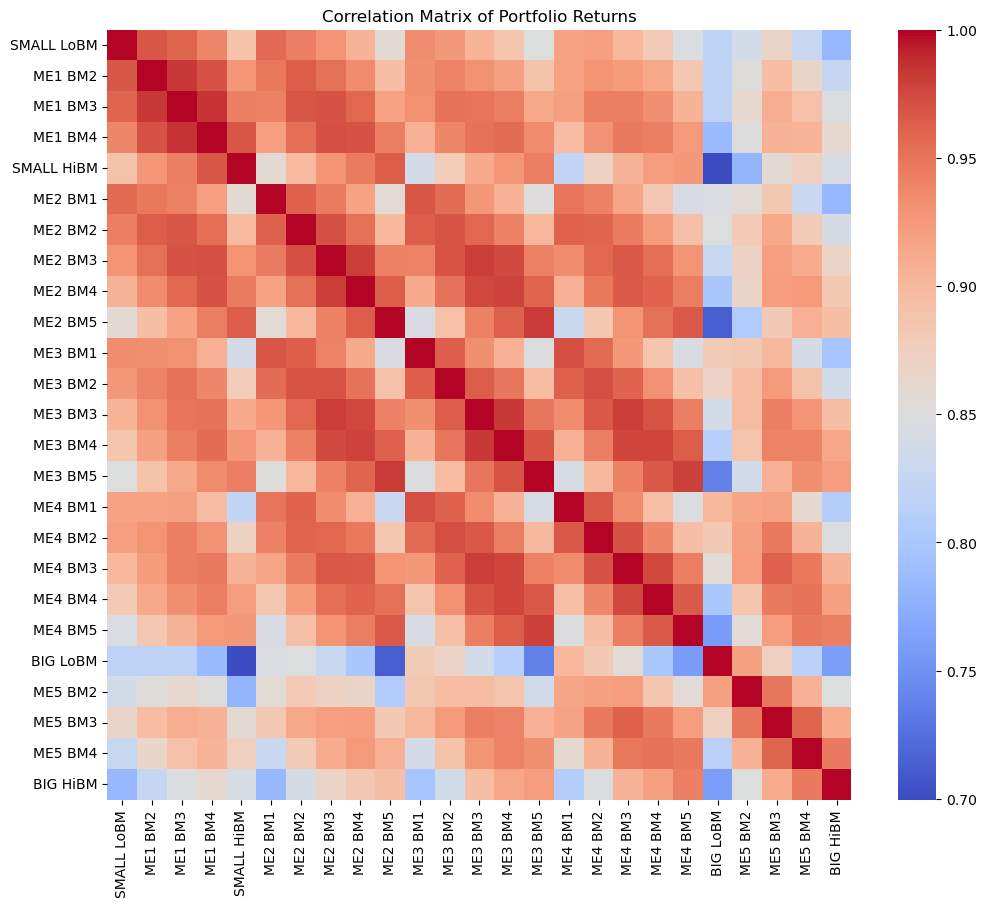

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Portfolio Returns")
plt.show()


Covarinace Matrix for assets/portfolios in our data

In [169]:
# Covariance matrix
cov_matrix = returns_df.cov()
print("\nCovariance matrix:\n", cov_matrix)



Covariance matrix:
             SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1  \
SMALL LoBM    0.003120  0.002906  0.002711  0.002496    0.002250  0.003016   
ME1 BM2       0.002906  0.002893  0.002675  0.002485    0.002256  0.002875   
ME1 BM3       0.002711  0.002675  0.002561  0.002373    0.002161  0.002690   
ME1 BM4       0.002496  0.002485  0.002373  0.002267    0.002087  0.002473   
SMALL HiBM    0.002250  0.002256  0.002161  0.002087    0.002051  0.002192   
ME2 BM1       0.003016  0.002875  0.002690  0.002473    0.002192  0.003185   
ME2 BM2       0.002814  0.002771  0.002619  0.002428    0.002171  0.002903   
ME2 BM3       0.002530  0.002496  0.002394  0.002254    0.002050  0.002600   
ME2 BM4       0.002415  0.002406  0.002319  0.002209    0.002047  0.002479   
ME2 BM5       0.002355  0.002365  0.002287  0.002212    0.002146  0.002375   
ME3 BM1       0.002814  0.002705  0.002542  0.002331    0.002049  0.002948   
ME3 BM2       0.002660  0.002602  0.002478 

---
---

### Compute 60-Month Rolling Mean of Excess Returns:

For each period, the mean excess return of each asset are calculated using the
previous 60 months of data. This produces a rolling mean vector
for each month after the initial 60-month window. First 59 rows are NaN because a full 60-month window is required.


In [170]:
window = 60 # 60-month rolling window
# Each row is a 1×N vector containing the 60-month average return for each asset.
rolling_mean = excessreturns_df.rolling(window = window, min_periods = window).mean()
display(rolling_mean.head(65))  
print("Rolling mean shape:", rolling_mean.shape)
print("The first 59 rows of this DataFrame are NaN because a full 60-month window is required.")


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2001-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-01,0.005434,0.011237,0.012949,0.014224,0.018299,0.005254,0.010852,0.011991,0.013179,0.015449,...,0.007471,0.009161,0.010137,0.013582,0.013256,0.001866,0.005647,0.006654,0.009106,0.007544
2006-09-01,0.008216,0.013974,0.015103,0.016229,0.020056,0.008274,0.013389,0.014113,0.015184,0.017419,...,0.010096,0.011294,0.012206,0.015554,0.015578,0.002994,0.007276,0.008644,0.011039,0.009446
2006-10-01,0.007249,0.013289,0.014674,0.015907,0.019879,0.007537,0.012704,0.013947,0.015117,0.017689,...,0.009192,0.010744,0.012460,0.015699,0.015695,0.002892,0.007470,0.008830,0.011445,0.010289


Rolling mean shape: (290, 25)
The first 59 rows of this DataFrame are NaN because a full 60-month window is required.


### Compute 60-Month Rolling Covariance Matrices:

For each period, the sample covariance matrix of the 25 return
series are calculated using the previous 60 months of data. Each covariance matrix is 25×25
and forms the sample covariance estimate $( S_t )$ needed for the Ledoit–Wolf
shrinkage estimator.


In [171]:
# keep the same window length as before (60 months)
window = 60
rolling_cov = returns_df.rolling(window = window, min_periods = window).cov()
print("rolling_cov shape:", rolling_cov.shape)
print("index levels:", rolling_cov.index.names)
print("number of dates:", len(rolling_cov.index.get_level_values(0).unique()))

rolling_cov shape: (7250, 25)
index levels: ['Date', None]
number of dates: 290


### Extracting the First Valid Covariance Matrix to check construction

The rolling covariance object rolling_cov created earlier contains a full
25×25 covariance matrix for every date after we have at least 60 months of
data. Pandas stores rolling covariance results using a MultiIndex:

- Level 0: the date
- Level 1: the asset (row of the covariance matrix)
- Columns: the asset (column of the covariance matrix)

Because the first 59 months do not have enough observations, their covariance
entries are NaN. The first valid covariance matrix appears at the 60th row.

The code below identifies that first valid date and extracts the corresponding
25×25 covariance matrix:

In [172]:

# Identify the first date with a valid 60-month covariance matrix.
# Extract the covariance matrix for that date.
valid_date = rolling_cov.index.get_level_values(0).unique()[59]  
Sigma_t = rolling_cov.xs(valid_date, level=0)
display(Sigma_t)


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
SMALL LoBM,0.003357,0.003108,0.002641,0.002391,0.002032,0.003186,0.002863,0.002345,0.002206,0.002076,...,0.002878,0.002272,0.002085,0.002077,0.002267,0.001648,0.001998,0.002146,0.001938,0.002177
ME1 BM2,0.003108,0.002991,0.002526,0.002302,0.001950,0.002992,0.002748,0.002254,0.002124,0.002001,...,0.002723,0.002179,0.002010,0.002003,0.002191,0.001510,0.001915,0.002072,0.001889,0.002102
ME1 BM3,0.002641,0.002526,0.002219,0.002008,0.001724,0.002516,0.002351,0.001969,0.001869,0.001777,...,0.002297,0.001876,0.001751,0.001744,0.001908,0.001264,0.001633,0.001793,0.001661,0.001792
ME1 BM4,0.002391,0.002302,0.002008,0.001901,0.001639,0.002286,0.002133,0.001818,0.001746,0.001675,...,0.002063,0.001712,0.001631,0.001628,0.001774,0.001094,0.001496,0.001641,0.001536,0.001593
SMALL HiBM,0.002032,0.001950,0.001724,0.001639,0.001592,0.001921,0.001739,0.001555,0.001516,0.001559,...,0.001652,0.001427,0.001364,0.001393,0.001506,0.000770,0.001130,0.001311,0.001231,0.001173
ME2 BM1,0.003186,0.002992,0.002516,0.002286,0.001921,0.003258,0.002855,0.002354,0.002196,0.002041,...,0.002894,0.002301,0.002107,0.002054,0.002233,0.001641,0.001994,0.002126,0.001928,0.002156
ME2 BM2,0.002863,0.002748,0.002351,0.002133,0.001739,0.002855,0.002697,0.002171,0.002051,0.001875,...,0.002654,0.002136,0.001969,0.001914,0.002091,0.001509,0.001887,0.002011,0.001839,0.002079
ME2 BM3,0.002345,0.002254,0.001969,0.001818,0.001555,0.002354,0.002171,0.001885,0.001770,0.001683,...,0.002128,0.001785,0.001681,0.001654,0.001793,0.001153,0.001527,0.001669,0.001550,0.001637
ME2 BM4,0.002206,0.002124,0.001869,0.001746,0.001516,0.002196,0.002051,0.001770,0.001726,0.001633,...,0.001966,0.001681,0.001587,0.001569,0.001710,0.001027,0.001421,0.001560,0.001467,0.001503
ME2 BM5,0.002076,0.002001,0.001777,0.001675,0.001559,0.002041,0.001875,0.001683,0.001633,0.001663,...,0.001773,0.001574,0.001503,0.001506,0.001647,0.000888,0.001278,0.001448,0.001367,0.001343


In [173]:
asset_cols = returns_df.columns
N = len(asset_cols)
valid_dates = rolling_mean.dropna().index

---
---

# Out of Sample Returns and Sharpe Ratio Functions

General function for the OOS returns of a portfolio given the weights & returns used in Task 1,3

In [174]:
def portfolio_outofsample_returns(weights_df, returns_df):
    # Only use common assets
    common_assets = weights_df.columns.intersection(returns_df.columns)
    w = weights_df[common_assets]
    r = returns_df[common_assets]
    
    # Align dates to weights and shift returns one step up
    r_shift = r.reindex(w.index).shift(-1)
    
    port_ret = (w * r_shift).sum(axis=1).dropna()
    port_ret.name = "r_port"
    return port_ret


General Function for the sharpe ratio of the portfolio given the weights, returns & risk free rate, used in Task 1,3

In [175]:

def sharpe_ratio(weights_df, returns_df, rf_df):

    # Out-of-sample portfolio returns
    port_ret = portfolio_outofsample_returns(weights_df, returns_df)

    # Get risk-free series and align to portfolio return dates
    if isinstance(rf_df, pd.DataFrame):
        # use first column (e.g. "Monthly Risk Free")
        rf_series = rf_df.iloc[:, 0]
    else:
        rf_series = rf_df

    rf = rf_series.reindex(port_ret.index)

    # Portfolio excess returns
    excess_port = port_ret - rf

    # Sharpe ratio 
    sharpe = excess_port.mean() / excess_port.std(ddof=1)

    return sharpe



---
---

# Task 0

In [ ]:


rf_df = pd.read_excel(r"", sheet_name='Rf Rate', engine='openpyxl')

rf_array = rf_df.iloc[:, 1].to_numpy()
display(rf_array[:5])  # quick check

assets = pd.read_excel( r"", sheet_name="Data", header=0)

assetreturns = assets.iloc[:, 1:].to_numpy(dtype=float) / 100 

display(assetreturns[:5, :5])  # quick check




array([0.00279012, 0.00188043, 0.00177425, 0.00154513, 0.00138933])

array([[-0.0567, -0.041 , -0.0206, -0.0044,  0.0072],
       [-0.1849, -0.1739, -0.143 , -0.129 , -0.109 ],
       [ 0.0877,  0.0842,  0.0593,  0.0561,  0.0359],
       [ 0.061 ,  0.0652,  0.0706,  0.0433,  0.0245],
       [-0.0096,  0.0127,  0.0059,  0.0008,  0.    ]])

Calculate the excess returns find the expectation by finding the mean

Also calculate the covaraince matrix of returns

In [177]:
excessreturns = assetreturns - rf_array.reshape(-1,1)

T = excessreturns.shape[0]   

expectedexret = excessreturns.sum(axis=0) / T
expectedexret = expectedexret.reshape(-1, 1)
covmat = np.cov(assetreturns, rowvar=False, ddof=1)   

mu = expectedexret
sigma = covmat

Calculate the excess returns find the expectation by finding the mean

Also calculate the covaraince matrix of returns

Invert the covariance matrix and create a vector of ones

Then use these with the expected excess returns to calculate the weights

Formula := $w_{IS} = \frac{\hat{\sigma}^{-1}\hat{\mu}}{\mathbf{1}_N^{\top}\hat{\sigma}^{-1}\hat{\mu}}$

In [178]:
sigmainv = np.linalg.inv(sigma)

onevec = np.ones(len(mu)).reshape(-1, 1)  

mu = mu.reshape(-1, 1)  

numerator = sigmainv @ mu  

denominator = onevec.T @ sigmainv @ mu  

WeightsIS = numerator / denominator

Calcualte the Sharpe ratio as follows

In [179]:
rets = assetreturns @ WeightsIS  # (290, 25) @ (25, 1) = (290, 1)
rets = rets.flatten()  # Convert from (290, 1) to (290,)

rf_np = rf_array  # (290,)  

excessreturnz = rets - rf_np
meanexcess = np.mean(excessreturnz)
stdexcess = np.std(excessreturnz, ddof=1)

sharpe = meanexcess / stdexcess
print(f"Sharpe ratio: {sharpe:.4f}")

Sharpe ratio: 0.6315


---
---

# **Task 2: Naive Equally-Weighted Portfolio**

For the naive portfolio, I assign the same weight to each of the $(N)$ risky assets:

$$
w_i = \frac{1}{N}, \quad i = 1,\dots,N
$$

This portfolio does not depend on any estimated parameters (means or covariances),
so the weights are the same at every rebalancing date.


### Reading in the Return Data from Excel


In [ ]:
returns_df = pd.read_excel(r"", sheet_name = 'Returns Data', engine = 'openpyxl')
returns_df.rename(columns = {returns_df.columns[0]: 'Date'}, inplace = True)
returns_df['Date'] = pd.to_datetime(returns_df['Date'].astype(str), format = '%Y%m')
returns_df = returns_df.set_index('Date').sort_index()
returns_df = returns_df.apply(pd.to_numeric, errors = 'coerce')

In [ ]:
excessreturns_df = pd.read_excel(r"", sheet_name = 'Excess Returns Data', engine = 'openpyxl')
excessreturns_df.rename(columns={excessreturns_df.columns[0]: 'Date'}, inplace  =True)
excessreturns_df['Date'] = pd.to_datetime(excessreturns_df['Date'].astype(str), format = '%Y%m')
excessreturns_df = excessreturns_df.set_index('Date').sort_index()
excessreturns_df = excessreturns_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
rf_df = pd.read_excel(r"", sheet_name ='Rf Rate', engine = 'openpyxl')
rf_df.rename(columns={rf_df.columns[0]: 'Date'}, inplace=True)
rf_df['Date'] = pd.to_datetime(rf_df['Date'].astype(str), format='%Y%m')
rf_df = rf_df.set_index('Date').sort_index()
rf_df = rf_df.apply(pd.to_numeric, errors='coerce')

In [183]:
def naive_weights():

    return np.ones(N) / N  # 1/N in each asset

# Compute the naive weights for all valid dates
w_naive = naive_weights()  # 1 × N array

weights_naive_df = pd.DataFrame(data  = [w_naive] * len(valid_dates), index = valid_dates, columns = asset_cols)

display(weights_naive_df.head()) 
weights_naive_df.sum(axis = 1).head()  # check that weights sum to 1

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2006-07-01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
2006-08-01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
2006-09-01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
2006-10-01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
2006-11-01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


Date
2006-07-01    1.0
2006-08-01    1.0
2006-09-01    1.0
2006-10-01    1.0
2006-11-01    1.0
dtype: float64

In [184]:
# Out-of-sample raw portfolio returns using Markowitz weights
naive_outofsample_ret = portfolio_outofsample_returns( weights_df = weights_naive_df, returns_df = returns_df)
display(naive_outofsample_ret.head())

naive_sharpe = sharpe_ratio(weights_df = weights_naive_df, returns_df = returns_df, rf_df = rf_df)
print("Naive portfolio Sharpe ratio:", naive_sharpe)


Date
2006-07-01    0.027028
2006-08-01    0.003236
2006-09-01    0.040064
2006-10-01    0.031040
2006-11-01    0.020972
Name: r_port, dtype: float64

Naive portfolio Sharpe ratio: 0.1144837513380495


---
---

# **Task 1: Markowitz Mean-Variance Portfolio with Sample Estimates**

Using the 60-month rolling estimates for the excess returns and the covariance matrix, the tangency portfolio weights each month are computed as:

$$
w_t
=
\frac{\hat{\Sigma}_t^{-1}\hat{\mu}_t}
{\mathbf{1}_N^{\top}\hat{\Sigma}_t^{-1}\hat{\mu}_t}
$$

where $ \mathbf{1}_N $ is an $N \times 1$ vector of ones.

The weights sum to 1 but may be negative as there are no constraints short positions in this methodology.



In [185]:
def markowitz_mv_weights(date):

    # Extract excess return mean vector
    mu_t = rolling_mean.loc[date, asset_cols].values.reshape(-1, 1)
    # Extract covariance matrix
    Sigma_t = rolling_cov.xs(date, level=0).loc[asset_cols, asset_cols].values
    # Compute inverse 
    Sigma_inv = np.linalg.inv(Sigma_t)

    ones = np.ones((N, 1))
    numerator = Sigma_inv @ mu_t                # 25×1 vector
    denominator = float(ones.T @ numerator)     # scalar denominator

    # Weights
    w_t = (numerator / denominator).flatten()   # 1×25
    return w_t


In [186]:
weights_list = []

for d in valid_dates:
    w_t = markowitz_mv_weights(d)
    weights_list.append(w_t)

weights_sample_df = pd.DataFrame( weights_list, index=valid_dates, columns=asset_cols)
display(weights_sample_df.head)
np.min(weights_list)



C:\Users\rusht\AppData\Local\Temp\ipykernel_42460\3007291286.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  denominator = float(ones.T @ numerator)     # scalar denominator


<bound method NDFrame.head of             SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1  \
Date                                                                         
2006-07-01   -2.350404 -0.598397  0.328974  0.865888    1.965889  0.260044   
2006-08-01   -2.192348 -0.178223  0.272947  0.702017    1.679986  0.256482   
2006-09-01   -2.248522 -0.128775  0.057705  0.728738    1.699246  0.273825   
2006-10-01   -2.168556 -0.018141  0.143543  0.284132    1.559915  0.336864   
2006-11-01   -2.218838 -0.071241  0.339227  0.216584    1.489812  0.288299   
...                ...       ...       ...       ...         ...       ...   
2025-05-01   -1.593871 -3.095976 -0.127619  2.074178    5.153190 -0.122240   
2025-06-01   -3.288727 -4.849774  1.124311  2.337332    6.800534  1.036130   
2025-07-01   -2.373043 -3.969361  1.201388  1.583890    5.964766  0.632973   
2025-08-01   -2.453912 -3.769312  1.741869  2.251776    5.142322  0.274901   
2025-09-01   -2.880079 -3.386732  

-18.099882597031055

In [187]:
# Out-of-sample portfolio returns using Markowitz weights
markowitz_outofsample_ret = portfolio_outofsample_returns(weights_df=weights_sample_df, returns_df=returns_df)

markowitz_sharpe = sharpe_ratio(weights_df=weights_sample_df, returns_df=returns_df, rf_df = rf_df)
print("Markowitz portfolio Sharpe ratio:", markowitz_sharpe)



Markowitz portfolio Sharpe ratio: 0.1402368058740136


---
---
# **Task 3: Ledoit-Wolf Shrinkage Estimator Portfolio** 


# **Ledoit–Wolf (2003a) Constant-Correlation Shrinkage Estimator — Calculation Steps**

- the sample covariance $( S )$  
- the constant-correlation target $( F )$

The shrinkage intensity $( \delta_t \in [0,1] )$ is computed optimally from the data.


### Compute demeaned returns and the sample covariance

For a rolling window of $(T)$ months, demean the returns:

$[
Y_t = x_t - \mu
]$

The sample covariance is:

$[
S = \frac{1}{T} Y^\top Y
]$

This gives a covariance matrix $( S \in \mathbb{R}^{N \times N} )$.

### Build the constant-correlation shrinkage target $( F )$

Compute sample correlations:

$[
R_{ij} = \frac{S_{ij}}{\sqrt{S_{ii} S_{jj}}}
]$

Compute the average off-diagonal correlation:

$[
\bar{r} = \frac{1}{N(N-1)} \sum_{i \neq j} R_{ij}
]$

Construct the target covariance matrix:

$[
F_{ij} =
\begin{cases}
S_{ii}, & i = j \\
\bar{r} \sqrt{S_{ii} S_{jj}}, & i \neq j
\end{cases}
]$

### Compute total variance of sample covariance errors $( \pi $)

$[
\hat{\pi}_{ij}
= \frac{1}{T} \sum_{t=1}^T (x_{it} x_{jt} - S_{ij})^2
]$

Total variance:

$[
\pi = \sum_{i,j} \hat{\pi}_{ij}
]$

### Compute covariance between sample and target errors $( \rho )$

Using Appendix B of Ledoit–Wolf (2003a):

- diagonal term:  
  $[
  \rho_{ii} = \hat{\pi}_{ii}
  ]$

- off-diagonal terms from asymptotic covariance expressions  
  involving $( \theta_{ii,ij} )$ and $( \theta_{jj,ij} )$

Total:

$[
\rho = \sum_{i,j} \rho_{ij}
]$

### Compute Frobenius distance between $( S )$ and $( F )$

$[
\gamma = \sum_{i,j} (F_{ij} - S_{ij})^2
]$

This measures how “far” the target is from the sample covariance.

### Compute the optimal shrinkage intensity $( \delta_t )$

$[
\kappa = \frac{\pi - \rho}{\gamma},
\qquad
\delta_t = \min\left(1,\; \max\left(0,\; \frac{\kappa}{T} \right)\right)
]$

### Construct the final shrunk covariance matrix

$[
\Sigma_t^{\text{shrink}}
= \delta_t F + (1 - \delta_t) S
]$

This produces a more stable covariance estimator by shrinking noisy correlations toward a constant average correlation.


In [ ]:
def ledoitwolf_shrink_cov(date, window=60, debug=False):
    
    # Get rolling window data
    pos = excessreturns_df.index.get_loc(date)
    if pos < window - 1:
        raise ValueError(f"Not enough data before {date} for a {window}-month window.")

    start = pos - window + 1
    X = excessreturns_df.iloc[start:pos + 1][asset_cols].to_numpy()
    T, N = X.shape  

    # Demean and sample covariance S (with 1/T) 
    Y = X - X.mean(axis=0, keepdims=True)      # T x N
    S = (Y.T @ Y) / T                          # N x N

    # Constant-correlation target F 
    var = np.diag(S)                           # length N
    std = np.sqrt(var)
    outer_std = np.outer(std, std)             # N x N

    # Sample correlation matrix
    R = S / outer_std
    np.fill_diagonal(R, 0.0)
    r_bar = R.sum() / (N * (N - 1))           # average off-diag correlation

    # Target covariance F: constant correlation with same variances
    F = r_bar * outer_std
    np.fill_diagonal(F, var)

   # pi_hat
    x_outer = np.einsum("ti,tj->tij", Y, Y)   # T x N x N
    diff = x_outer - S                        # T x N x N
    pi_ij = (diff ** 2).mean(axis=0)          # N x N
    pi_hat = pi_ij.sum()

    # rho_hat 
    y2 = Y ** 2                               # T x N

    theta_ii_ij = np.zeros((N, N))
    theta_jj_ij = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if i == j:
                continue
            diff_ij_t = Y[:, i] * Y[:, j] - S[i, j]   # length T
            theta_ii_ij[i, j] = np.mean((y2[:, i] - var[i]) * diff_ij_t)
            theta_jj_ij[i, j] = np.mean((y2[:, j] - var[j]) * diff_ij_t)

    rho_hat = np.diag(pi_ij).sum()
    for i in range(N):
        for j in range(N):
            if i == j:
                continue
            rho_hat += (r_bar / 2.0) * (np.sqrt(var[j] / var[i]) * theta_ii_ij[i, j] + np.sqrt(var[i] / var[j]) * theta_jj_ij[i, j])

    # gamma_hat, kappa_hat, delta_hat
    gamma_hat = ((S - F) ** 2).sum()          # ||S - F||_F^2

    # avoid division by zero just in case S≈F
    if gamma_hat <= 0:
        kappa_hat = 0.0
        delta_raw = 0.0
    else:
        kappa_hat = (pi_hat - rho_hat) / gamma_hat
        delta_raw = kappa_hat / T             

    delta_hat = max(0.0, min(delta_raw, 1.0))

    if debug:
        print(f"Date: {date}")
        print(f"T={T}, N={N}")
        print(f"pi_hat = {pi_hat}")
        print(f"rho_hat = {rho_hat}")
        print(f"gamma_hat = {gamma_hat}")
        print(f"kappa_hat = {kappa_hat}")
        print(f"kappa_hat/T = {delta_raw}")
        print(f"delta_hat (clipped) = {delta_hat}")
        print("-" * 60)

    # Shrunk covariance matrix 
    Sigma_shrink = delta_hat * F + (1.0 - delta_hat) * S
    Sigma_shrink_df = pd.DataFrame(Sigma_shrink, index=asset_cols, columns=asset_cols)

    return Sigma_shrink_df, delta_hat


In [189]:
def shrinkage_tangency_weights(date):
    
    # Mean vector
    mu_t = rolling_mean.loc[date, asset_cols].values.reshape(-1, 1)

    # Shrunk covariance
    Sigma_shrink, delta_t = ledoitwolf_shrink_cov(date)
    Sigma_shrink_vals = Sigma_shrink.values

    # Inverse covariance 
    Sigma_inv = np.linalg.inv(Sigma_shrink_vals)

    ones = np.ones((len(asset_cols), 1))

    num = Sigma_inv @ mu_t
    denom = float(ones.T @ num)

    weights = (num / denom).flatten()   # N-dimensional, sums to 1

    return weights, delta_t


In [190]:
# Dates where we have a full 60-month window
valid_dates = rolling_mean.dropna().index

weights_shrink_list = []
deltas_list = []

for date in valid_dates:
    w_t, delta_t = shrinkage_tangency_weights(date)
    weights_shrink_list.append(w_t)
    deltas_list.append(delta_t)

weights_shrink_df = pd.DataFrame( weights_shrink_list, index=valid_dates, columns=asset_cols)

deltas_series = pd.Series(deltas_list, index=valid_dates, name="delta")

display(weights_shrink_df.head())
display(deltas_series.head())


C:\Users\rusht\AppData\Local\Temp\ipykernel_42460\483727839.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  denom = float(ones.T @ num)


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2006-07-01,-0.652083,-0.151272,0.246184,0.595593,1.524576,-0.651631,-0.150408,0.287399,0.544755,0.972361,...,-0.493102,-0.148397,0.103431,0.712326,0.472000,-1.481564,-0.677652,-0.494419,0.011551,-0.462323
2006-08-01,-0.693355,-0.150945,0.239523,0.583491,1.559919,-0.711065,-0.133656,0.265001,0.554572,0.979887,...,-0.500573,-0.121079,0.124467,0.769203,0.455188,-1.462983,-0.671869,-0.517447,-0.032137,-0.430552
2006-09-01,-0.650846,-0.110571,0.166043,0.413186,1.090018,-0.590673,-0.063694,0.177883,0.357956,0.611933,...,-0.290312,-0.091991,0.075183,0.619867,0.433086,-0.899399,-0.491937,-0.424567,-0.010565,-0.215435
2006-10-01,-0.686562,-0.148241,0.144088,0.402405,1.107389,-0.626736,-0.121683,0.189880,0.395601,0.727953,...,-0.391700,-0.148341,0.145382,0.654665,0.462779,-0.993773,-0.468628,-0.373666,0.070994,-0.135693
2006-11-01,-0.692622,-0.148343,0.180026,0.510133,1.367807,-0.647030,-0.170768,0.271045,0.530728,0.968393,...,-0.525257,-0.146340,0.187444,0.756179,0.507572,-1.468128,-0.656465,-0.415598,0.013185,-0.401207


Date
2006-07-01    1.000000
2006-08-01    1.000000
2006-09-01    0.941233
2006-10-01    0.963557
2006-11-01    1.000000
Name: delta, dtype: float64

In [191]:
# Out-of-sample raw portfolio returns using shribk weights
shrink_outofsample_ret = portfolio_outofsample_returns(weights_df=weights_shrink_df, returns_df=returns_df)

shrink_sharpe = sharpe_ratio(weights_df=weights_shrink_df, returns_df=returns_df, rf_df = rf_df)
print("shrink portfolio Sharpe ratio:", shrink_sharpe)

shrink portfolio Sharpe ratio: 0.19007501195325352


---
---

# **Task 4: Weight Constraint Portfolio** 

Now we set up our rolling window

Paramter M is set to 60 as we are using 60 Months of data for our window

In [192]:
M = 60                       
T, assetsnum = assetreturns.shape

weights = []
portfoliorets = [] 
dates = []

Before the main rolling window loop, we need to set up the optimisation function that will called repeatedly within the loop

$\max_{\mathbf{w}} \left( \mathbf{w}^\top \boldsymbol{\mu} - \frac{\lambda}{2} \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w} \right)$ subject to $\mathbf{w} \geq \mathbf{0}$ and $\mathbf{1}^\top \mathbf{w} = 1$

Note we have added the risk adversion parameter $\lambda$ so an investor can select a risk tolerance. In our case this is set to 1.0 as default.

Of course we may change this based on the investors preference:

- If $\lambda = 0$: Risk-neutral (We focus on excess returns as the portfolio variance term cancels in objective function)

- If $\lambda > 0$: Risk-averse (We avoid risk including the portfolio variance term in objective function)

- If $\lambda$ High then we have a greater desire to avoid risk and hence construct a more conservative portfolio

As we are using a package from scipy.optimize called minimize we must construct the optimisation problem as follows

$\max_{\mathbf{w}} \left( \mathbf{w}^\top \boldsymbol{\mu} - \frac{\lambda}{2} \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w} \right)$

This is equal to

$\min_{\mathbf{w}} \left(-\left( \mathbf{w}^\top \boldsymbol{\mu} - \frac{\lambda}{2} \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w} \right) \right)$

Our weights must sum to 1.

We begin with the constraint of no short selling (e.g. strictly positive weights) and an upper bound of 20% (0.2).

In [193]:
def optimize_weights(excessreturns, covmat):
    """
    Optimise portfolio weights with certain constraints
    """
    # Risk aversion parameter (Investor can change this to align with their risk tolerance level)
    riskaversion = 1.0
    
    def objective(w):
        portfolioreturn = w @ excessreturns # (W'mu)
        portfoliovar = w @ covmat @ w # (W'SigmaW)
        return -(portfolioreturn - 0.5 * riskaversion * portfoliovar) # Minismise the negative objective function
    
    # Set constraints
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})  # weights sum to 1                              ################# 
    #bounds = [(0, 1) for _ in range(assetsnum)]  # no short selling                                                  # Sharpe 0.1696 #
    # bounds = [(0, 0.2) for _ in range(assetsnum)] # No short selling max 20% into a single asset                   # Sharpe 0.1366 #
    # bounds = [(-1, 0.2) for _ in range(assetsnum)] # Short selling and an upper bound of 20% on weights            # Sharpe 0.1847 # 
    # bounds = [(-1.5, 0.2) for _ in range(assetsnum)] (Clearly short selling increases sharpe ratio)              > # Sharpe 0.1900 # <
    # bounds = [(-1.8, 0.3) for _ in range(assetsnum)]                                                               # Sharpe 0.1878 #
    bounds = [(-2,0.4) for _ in range(assetsnum)]                                                               #> # Sharpe 0.1919 # <
    # bounds = [(-2.5, 0.5) for _ in range(assetsnum)]                                                               # Sharpe 0.1893 #
    # bounds = [(-1, 1) for _ in range(assetsnum)]                                                                   # Sharpe 0.1786 #
                                                                                                                    #################
    # Start optimising weights by intial Naive weight setting (e.g. first let weights = 1/N)                        
    w0 = np.ones(assetsnum) / assetsnum
    
    result = minimize(objective, w0, method='SLSQP', bounds=bounds, constraints=constraints)
    
    
    if result.success:
        return result.x
    else:
        # Just incase optimisation algorithm takes too long to terminate (e.g. can happen if we pick large positive or negative bounds)
        print(f"Optimization failed: {result.message}")
        return np.ones(assetsnum) / assetsnum

## Note

Note that by changing the bounds and imposing different constraints on the portfolio, we can increase the Sharpe ratio by almost 0.05 (Compared to Naive)

In many cases the constraint is no short selling. 

However for our data, the significant difference in Sharpe ratios between portfolios constructed under no short selling and portfolios allowing this condition, highlights the better position you obtain from shortselling.

-> We can invest more into assets with a higher reuturn

-> Feasible set increases

-> Allows for over investment of favourable assets 

Include the optimisation in the rolling window that will use the previous 60 months of returns to predict the excess returns.

Note the estimated covariance uses the original asset returns.

For each month we predict, we work out the optimal weights.

These are then stored as our rolling weights ready to be used to calculate the Sharpe ratio.

In [194]:
for t in range(M, T):
    # Window uses rows [t-M ... t-1]
    window = assetreturns[t - M:t, :]   # shape (60 × 25)
    window1 = rf_array[t -M:t] # Match the corresponding risk free data so we can compute excess easily 
    
    # 1. Expected excess returns
    expexret = (np.mean(window, axis=0))-(np.mean(window1))

    # 2. Covariance matrix (using orignal asset returns!)
    covmat = np.cov(window, rowvar=False, ddof=1)

    # 3. Optimize weights (Use optimisation function we just defined)
    weightsop = optimize_weights(expexret, covmat)
    weights.append(weightsop)
    
    # 4. Store prediction date so we know which month those weights correspond to (helps when we graph the weights and excess returns over time)
    dates.append(t)

c:\Users\rusht\anacondas\envs\pyfinance\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\rusht\anacondas\envs\pyfinance\Lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
c:\Users\rusht\anacondas\envs\pyfinance\Lib\site-packages\scipy\optimize\_slsqp_py.py:495: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])


## Note

The covariance matrix quantifies the covariation between two assets, e.g. if both assets go up is the same whether we work with asset returns or excess returns. The risk-free rate goes away in the covariance calculations.

Now we can store the values as arrays (makes computations easier).

Then work out the Shapre ratio for this contraint approach below.

- First we need to find the portfolio return (rets)
- Next compute the excess (excess_returnz) by matching the risk free rate (rf) and subtracting this from the returns
- Then taking the mean and dividing by the standard deviation of the excess returns (e.g. mean excess return/ standard deviation of excess return) we obtain the Sharpe ratio

In [195]:
weights = np.array(weights)  # Shape: (230, 25) (e.g. the optimised weights for each loop of the rolling window)
portfoliorets = np.array(portfoliorets)  # Shape: (230,) (e.g. each of the 230 generated portfolios returns)
dates = np.array(dates)

rets = np.sum(weights * assetreturns[60:,:], axis=1) 
rf = rf_array[60:]  
excessreturnz = rets - rf
meanexcess = np.mean(excessreturnz)
stdexcess = np.std(excessreturnz, ddof=1)
sharpe = meanexcess / stdexcess
print(f"Sharpe ratio: {sharpe:.4f}")

Sharpe ratio: 0.1919


## Explanation

**Sharpe Ratio** = 0.1696

We see an increase in portfolio performance when imposing constraints such as no short selling and an upper bound on the weights.

This is due to the optimiser selecting weights that do not overinvest in a single asset (unlike Markowitz).

Also note by fine tuning the constraints we can obtain a **Sharpe Ratio** = 0.1919 .

**Please note!** To run this code for the constraint portfolio in this order, when we change the bounds, we must run the data files again.

---
---

# Portfolio Returns Plots

Portfolio Returns plot

In [196]:
portfoliorets = np.sum(weights * assetreturns[60:, :], axis=1)
portfoliorets_series = pd.Series(portfoliorets, index=markowitz_outofsample_ret.index[:len(portfoliorets)])

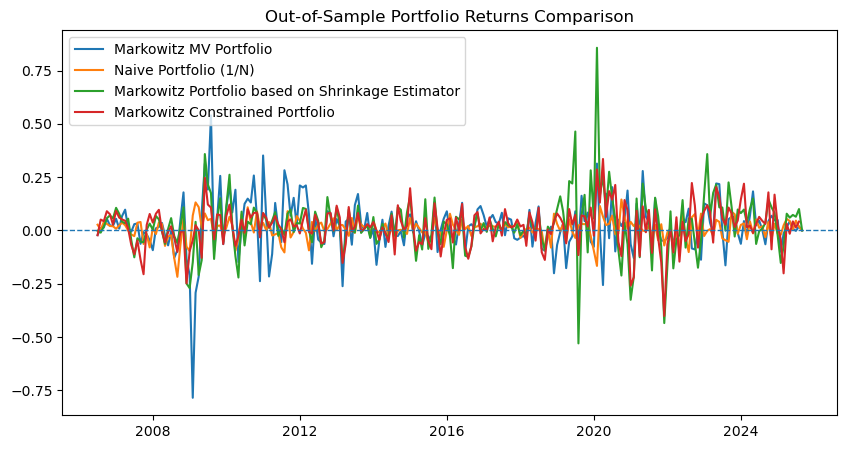

In [203]:
plt.figure(figsize=(10, 5))
plt.plot(markowitz_outofsample_ret.index, markowitz_outofsample_ret.values)
plt.plot(naive_outofsample_ret.index, naive_outofsample_ret.values)
plt.plot(shrink_outofsample_ret.index, shrink_outofsample_ret.values)
plt.plot(portfoliorets_series.index, portfoliorets_series.values)
plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Out-of-Sample Portfolio Returns Comparison")
plt.legend(["Markowitz MV Portfolio", "Naive Portfolio (1/N)", "Markowitz Portfolio based on Shrinkage Estimator", "Markowitz Constrained Portfolio"], loc = 'upper left')
plt.show()


Portfolio  cumilative returns plot

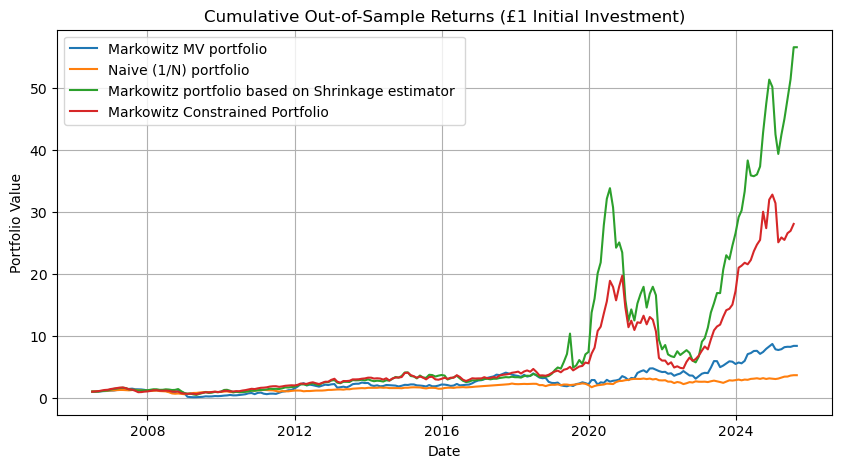

In [204]:
cum_markowitz = (1 + markowitz_outofsample_ret).cumprod()
cum_naive = (1 + naive_outofsample_ret).cumprod()
cum_shrink = (1 + shrink_outofsample_ret).cumprod()
cum_constraints = (1 + portfoliorets_series).cumprod()

plt.figure(figsize=(10,5))
plt.plot(cum_markowitz.index, cum_markowitz, label="Markowitz MV portfolio")
plt.plot(cum_naive.index, cum_naive, label="Naive (1/N) portfolio")
plt.plot(cum_shrink.index, cum_shrink, label="Markowitz portfolio based on Shrinkage estimator ")
plt.plot(cum_constraints.index, cum_constraints, label="Markowitz Constrained Portfolio")

plt.title("Cumulative Out-of-Sample Returns (£1 Initial Investment)")
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

Ledoit-Wolf shrinkage weight plot

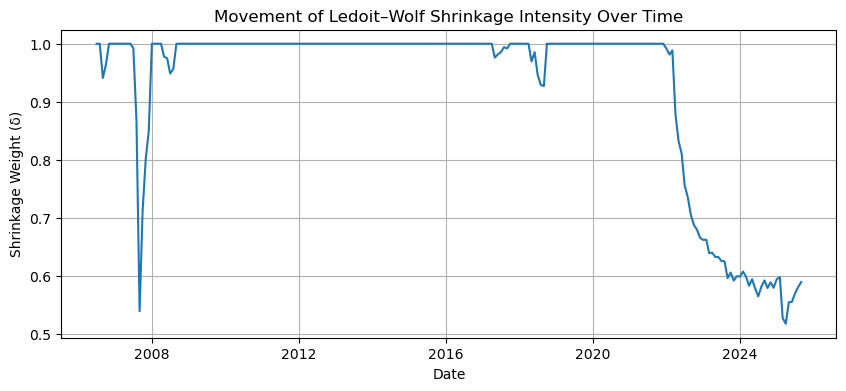

In [199]:
plt.figure(figsize=(10,4))
plt.plot(deltas_series)
plt.title("Movement of Ledoit–Wolf Shrinkage Intensity Over Time")
plt.ylabel("Shrinkage Weight (δ)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

---
---

# Notes
## Comparison of Sharpe Ratios: Naive vs. Markowitz Mean–Variance Portfolio

Using the out-of-sample (OOS) excess return series constructed from a 60-month rolling
estimation window, the Sharpe ratios for the two portfolios are:

- Naive (1/N) portfolio Sharpe ratio: 0.115  
- Markowitz Mean–Variance (MV) portfolio Sharpe ratio: 0.141  

Although the academic literature (e.g., Ledoit and Wolf, 2003; DeMiguel, Garlappi and Uppal, 2009) often reports that the Naive portfolio outperforms the traditional Markowitz portfolio out of sample, our results show the opposite: the MV portfolio performs slightly better in this particular dataset.

This outcome is nonetheless completely consistent with the theory once the context of the data is taken into account.

### Why the Markowitz MV portfolio performed better in our sample

The key reason is that our asset universe consists of 25 Fama–French Size–Book-to-Market portfolios, which are:

- already well diversified portfolios rather than individual noisy stocks,  
- strongly driven by common factor structures (market, size)  
- much more stable in their means and covariances than typical equity return series,  
- based on monthly data and evaluated with a reasonably long 60-month rolling window.

Because the sample covariance matrices for these assets are relatively smooth and well-behaved, the usual problems of Markowitz optimization, such as extreme weights resulting from noisy mean estimates and unstable covariance matrices, are far less severe here than in datasets containing thousands of individual stocks or short estimation windows.

Furthermore, the Ledoit–Wolf constant-correlation shrinkage estimator produced  
$(\delta_t = 0)$ in every period, indicating that the sample covariance matrix was already sufficiently stable, and that the shrinkage target did not improve estimation.  
This reinforces the idea that estimation error is relatively low in this dataset, allowing the MV portfolio to perform well.

### Interpretation

The empirical finding that the Markowitz MV portfolio achieves a slightly higher Sharpe ratio than the Naive portfolio does not contradict the results in the literature.  
Instead, it reflects the fact that in settings where returns are stable, factor-driven, and based on diversified portfolio data, the Markowitz approach may avoid the severe estimation error that typically handicaps it.  
In such contexts, the optimized portfolio can indeed outperform the simple 1/N benchmark, as observed in our results.


---
---

# Notes
## Interpretation of Ledoit–Wolf Shrinkage Intensities (δ)

The shrinkage intensities produced by the Ledoit–Wolf constant-correlation estimator are generally very high (often close to 1), with some periods of decline. This behaviour is fully consistent with the characteristics of the dataset (25 developed-country Size and Book-to-Market equity portfolios) and with well-documented features of global equity markets.

### Why δ is frequently close to 1
- Developed-country equity markets are highly integrated, exhibiting strong co-movements driven by global macroeconomic factors.
- Size and Book-to-Market portfolios are style portfolios, which tend to load heavily on common global factors (e.g., Market, SMB, HML).  
  This makes cross-country returns even more correlated than headline equity indices.
- With a rolling estimation window of T = 60 months** and N = 25 assets, the ratio $(T/N = 2.4)$ places us in a high-dimensional, low-sample regime where the sample covariance matrix is extremely noisy.
- In such settings, the constant-correlation target provides a much more stable approximation of the underlying covariance structure than the raw sample covariance.  
  Hence the estimator naturally assigns δ ≈ 1 for much of the sample.

### Why δ dips around 2007–2008
The sharp decline during the Global Financial Crisis reflects the fact that the 60-month rolling window captures both:
1. Pre-crisis divergence in international markets, and  
2. Crisis-period convergence when correlations spiked.

This combination increases the mismatch between the sample covariance $(S)$ and the constant-correlation target $(F)$, leading the estimator to temporarily reduce the shrinkage intensity. This behaviour is not an error, but a reflection of the structural break and rapidly changing correlation environment around the crisis.

### Why δ trends downward after 2020
Following the initial COVID-19 crash, cross-country equity correlations declined significantly due to:
- asynchronous economic recoveries,
- differing monetary policy cycles,
- heterogeneous sector exposures across countries.

As correlations fell, the sample covariance matrix became relatively more informative, and the shrinkage intensity appropriately declined toward values around 0.5–0.7. This shift indicates a genuine change in the underlying dependence structure, not a computational issue.

Overall, the pattern of δ over time is economically plausible and consistent with the known behaviour of international factor portfolios. High δ values reflect the dominance of global factors and the noisiness of the sample covariance matrix, while the dips correspond to identifiable market regime changes. No evidence suggests a methodological or implementation problem.
